In [10]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn import linear_model 
from sklearn.model_selection import train_test_split
import time

In [11]:
student_data =pd.read_csv(r"D:\DBDA\Adavance Stats\DAy 10\student-mat.csv")

student_data

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [12]:
student_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [13]:
col_str = student_data.columns[student_data.dtypes == object]
print(col_str)

Index(['school', 'gender', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


In [14]:
"""convert each category value into a new column and assign a 1 or 0 (True/False) value to the column
This has a benefit of not weighting a value improperly . Simplest method is using pandas '.get_dummies()
method 
drop_first =True  reduces extra column creation (eg. coin toss, is_head and is_tail : both are not needed) 
    """

student_data = pd.get_dummies(student_data,columns=col_str,drop_first=True)

In [17]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                395 non-null    int64
 1   Medu               395 non-null    int64
 2   Fedu               395 non-null    int64
 3   traveltime         395 non-null    int64
 4   studytime          395 non-null    int64
 5   failures           395 non-null    int64
 6   famrel             395 non-null    int64
 7   freetime           395 non-null    int64
 8   goout              395 non-null    int64
 9   Dalc               395 non-null    int64
 10  Walc               395 non-null    int64
 11  health             395 non-null    int64
 12  absences           395 non-null    int64
 13  G1                 395 non-null    int64
 14  G2                 395 non-null    int64
 15  G3                 395 non-null    int64
 16  school_MS          395 non-null    bool 
 17  gender_M        

In [19]:
student_data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,True,False,True,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,False,True,False,True,True,False,True,True,False,False
391,17,3,1,2,1,0,2,4,5,3,...,True,False,False,False,False,False,False,True,True,False
392,21,1,1,1,1,3,5,5,3,3,...,False,True,False,False,False,False,False,True,False,False
393,18,3,2,3,1,0,4,4,1,3,...,True,False,False,False,False,False,False,True,True,False


In [22]:
print(student_data[["G1","G2","G3"]].corr())

#Since G!,G2,G3 have very high correlation we can drop G1,G2

student_data.drop(axis=1,labels=["G1","G2"])

# drop the G3 column bcz we want to predict it now
label=student_data["G3"].values
predictors = student_data.drop(axis=1,labels=["G3"]).values
print(student_data.shape)

          G1        G2        G3
G1  1.000000  0.852118  0.801468
G2  0.852118  1.000000  0.904868
G3  0.801468  0.904868  1.000000
(395, 42)


In [24]:
#using PCA  
pca = PCA(n_components=len(student_data.columns)-1)

pca.fit(predictors)
variance_ratio =pca.explained_variance_ratio_
print(pca.explained_variance_.shape)



(41,)


In [25]:
# now plot 
# find cumulative variance ,adding one independent variable at atime 
variance_ratio_cum_sum = np.cumsum(variance_ratio)
print(variance_ratio_cum_sum)

[0.60249881 0.82425422 0.84911983 0.86994557 0.88895871 0.90683444
 0.9184901  0.92910161 0.93702158 0.94355752 0.94942391 0.95429968
 0.95866975 0.9630082  0.96640694 0.96972293 0.97258242 0.97508701
 0.97731633 0.97952796 0.98162043 0.98358934 0.98540947 0.98693444
 0.98836369 0.98977799 0.99104426 0.99226527 0.99329196 0.99430959
 0.99522784 0.99608811 0.99682872 0.99753783 0.99813929 0.99862811
 0.99906095 0.99944395 0.99975004 0.99991243 1.        ]


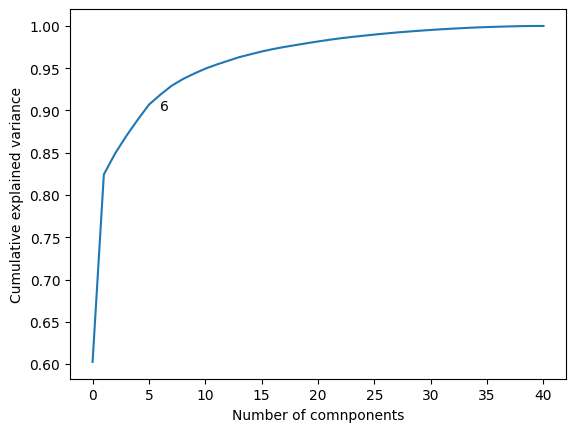

In [28]:
plt.plot(variance_ratio_cum_sum)
plt.xlabel("Number of comnponents")
plt.ylabel("Cumulative explained variance")

#annotate 90% variance explained by first 6 variables

plt.annotate('6',xy=(6,.90))
plt.show()

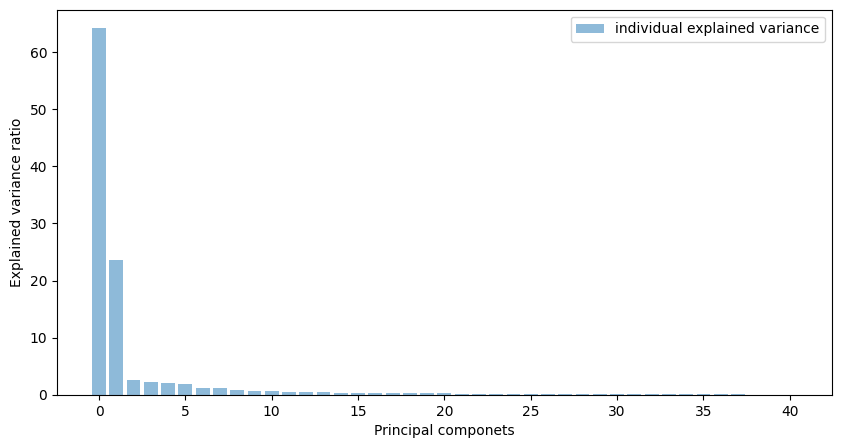

In [29]:
plt.figure(figsize=(10,5))
plt.bar(range(41),pca.explained_variance_,alpha=0.5,label='individual explained variance')
plt.xlabel("Principal componets")
plt.ylabel("Explained variance ratio")
plt.legend(loc='best')
plt.show()